In [1]:
#Feature Extraction and Scaling
import numpy as np
import pandas as pd
data = pd.read_csv('wdbc.csv')
y = np.array(data['Type'])
features = data.columns.to_list()
features.remove('ID')
features.remove('Type')
x = np.array(data[features])
xs = x.transpose()
xsc = np.zeros(np.shape(xs))
a, b = np.shape(xs)
i = 0
while i<a:
 z = np.array(xs[i,:])
 mini = np.min(z)
 maxi = np.max(z)
 j = 0
 while j<b:
  xsc[i,j] = (z[j] - mini)/(maxi - mini)
  j = j + 1
 i = i + 1
xs = xsc.transpose()
print(xs)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [3]:
#Data Partitioning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xs,y,test_size=0.2,random_state=0)
print(y_train.shape)

(455,)


In [3]:
#Train using SGDClassifier
from sklearn.linear_model import SGDClassifier
y_train = (y_train=='M')
y_test = (y_test=='M')
obj = SGDClassifier(max_iter=50,random_state=42)
obj.fit(x_train,y_train)

SGDClassifier(max_iter=50, random_state=42)

In [4]:
#Accuracy, Precision, Recall and Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
y_pred = obj.predict(x_test)
cm = np.array(confusion_matrix(y_test,y_pred))
tp = cm[0,0]
fn = cm[0,1]
fp = cm[1,0]
tn = cm[1,1]
accuracy = (tp+tn)/(tp+fp+fn+tn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(cm)
print(accuracy)
print(precision)
print(recall)

[[63  4]
 [ 1 46]]
0.956140350877193
0.984375
0.9402985074626866


In [5]:
#Cross Validation Results
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
print(cross_val_score(obj,x_train,y_train,cv=3,scoring='accuracy'))
print(cross_val_score(obj,x_test,y_test,cv=3,scoring='accuracy'))
y1 = cross_val_predict(obj,x_test,y_test,cv=3)
y2 = cross_val_predict(obj,x_train,y_train,cv=3)
print(accuracy_score(y_train,y2))
print(accuracy_score(y_test,y1))

[0.97368421 0.94078947 0.99337748]
[0.94736842 0.92105263 0.84210526]
0.9692307692307692
0.9035087719298246


In [6]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y1)

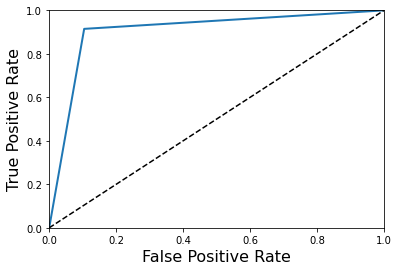

In [7]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()